In [1]:
# first running this after the training script ran for about 500 rounds

In [2]:
from game import *

pygame 2.6.1 (SDL 2.28.4, Python 3.12.8)
Hello from the pygame community. https://www.pygame.org/contribute.html


In [3]:
game_settings = BIG_tool_use_advanced_2_5
game_settings.gameSize = 224 # for compatibility with brain's expected size
G = discreteGame(game_settings) # kind of a waste; will only call this object to generate random versions of itself

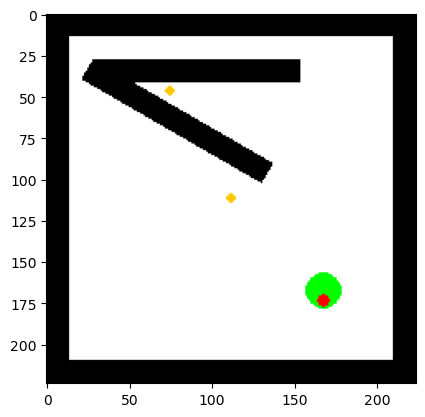

In [4]:
import matplotlib.pyplot as plt
plt.imshow(G.getData())

In [5]:
from RL_helper import *

In [6]:
from visual_transformer import *
device = torch.device('cuda:1') # doing this on the P40

In [7]:
def quick_display(torch_img):
    clean = torch_img.detach().cpu()
    right_order = torch.permute(clean, (1, 2, 0))
    array = right_order.numpy()
    plt.imshow(array)

In [8]:
symbol_action_map = {1: 1, 2: 2, 3: 3, 4: 4}
symbol_action_map

{1: 1, 2: 2, 3: 3, 4: 4}

In [31]:
# Next, I need to set up the brain itself
brain = DefaultAgentBrain(5).to(device)
brain.load_state_dict(torch.load("brain_checkpoints/brain_EXPERIMENTAL_5output_weights_semi-guided_RL_GRPO_v2_round10.pth", weights_only=True, map_location=device))

<All keys matched successfully>

In [32]:
brain.train()

DefaultAgentBrain(
  (img_enc): ImageTransformerEncoder(
    (embed): Sequential(
      (0): PatchEmbedding(
        (linear_project): Conv2d(3, 768, kernel_size=(14, 14), stride=(14, 14))
      )
      (1): PositionalEncoding_2D()
      (2): LayerNorm((768,), eps=1e-05, elementwise_affine=True)
      (3): Dropout(p=0.1, inplace=False)
    )
    (pe): PositionalEncoding_2D()
    (encoder): TransformerEncoder(
      (layers): ModuleList(
        (0-5): 6 x TransformerEncoderLayer(
          (self_attn): MultiheadAttention(
            (out_proj): NonDynamicallyQuantizableLinear(in_features=768, out_features=768, bias=True)
          )
          (linear1): Linear(in_features=768, out_features=2048, bias=True)
          (dropout): Dropout(p=0.1, inplace=False)
          (linear2): Linear(in_features=2048, out_features=768, bias=True)
          (norm1): LayerNorm((768,), eps=1e-05, elementwise_affine=True)
          (norm2): LayerNorm((768,), eps=1e-05, elementwise_affine=True)
          (

In [56]:
from RL_logic_solver import *

In [54]:
batch_size=16
buff = GameOutputBuffer(brain, brain.evaluate_text, gamma=0.99, tau=0.97, default_batch_size=batch_size)

In [57]:
#buff.fill(G, num_games=batch_size)
fake_data_fill(buff, G, batch_size, device=device)

In [35]:
# Let's examine game 0

In [58]:
buff.__dict__

{'seed_offset': 1,
 'max_agent_offset': 0.5,
 'tau': 0.97,
 'gamma': 0.99,
 'default_batch_size': 16,
 'contexts': None,
 'logpas': tensor([[0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
          0., 0., 0., 0., 0., 0., 0.],
         [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
          0., 0., 0., 0., 0., 0., 0.],
         [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
          0., 0., 0., 0., 0., 0., 0.],
         [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
          0., 0., 0., 0., 0., 0., 0.],
         [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
          0., 0., 0., 0., 0., 0., 0.],
         [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
          0., 0., 0., 0., 0., 0., 0.],

In [68]:
game_trace = buff.settings_buffer[0]

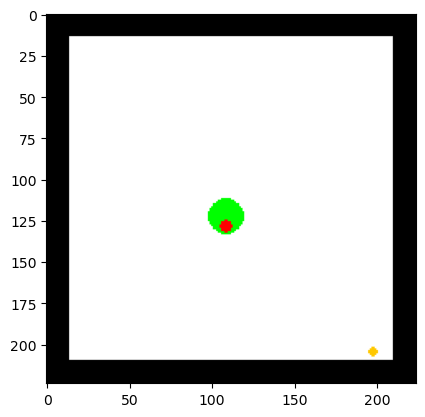

In [76]:
plt.imshow(discreteGame(game_trace[0]).getData())

In [73]:
game_trace[10].direction

6.263503083642475

In [77]:
game_trace[0].agent_x

0.5492681000722626

In [78]:
game_trace[10].agent_x

0.5492681000722626

In [79]:
buff.rewards

tensor([[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0,
         0, 0, 0, 0, 0, 0, 0, 0],
        [0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
         0, 0, 0, 0, 0, 0, 0, 0],
        [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
         0, 0, 0, 0, 0, 0, 0, 0],
        [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
         0, 0, 0, 0, 0, 0, 0, 0],
        [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0,
         0, 0, 0, 0, 0, 0, 0, 0],
        [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0,
         0, 0, 0, 0, 0, 0, 0, 0],
        [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
         0, 0, 0, 0, 0, 0, 0, 1],
        [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0,
         0, 0, 0, 0, 0, 0, 0, 0],
        [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0,

In [ ]:
# Main proble so far: all the settings are stored wrong. Only the initial value is storedd, not any subsequent one at all
# This is true at the very least in the case of the 'fake data fill' func.
# THis must change.
#
# It was also cool to see that, after round 10, the agent tried to turn and then go forward. It failed to go far enough, 
# but clearly this imitiation strategy works a little.
# fake_data-fill also needs not to call the dopamine func or the gaes, unless I want it to. Add that option.